In [1]:
# import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

import glob # for reading files

%matplotlib inline

# Circle Recognizer

Raspberry Pi camera:
- Angle of View: 62.2 x 48.8 degrees
- 3280 x 2464 pixel static images
More info: https://www.adafruit.com/product/3099



In [2]:
class Finder:
    # Circle properties
    diameter = 0.1 # m 

    # Camera properties
    xPixels = 3280
    yPixels = 2464

    xAngleOfView = 62.2/2 * np.pi/180 # rad
    yAngleOfView = 48.8/2 * np.pi/180 # rad


    # Helper constants
    widthAt1m = 2 * np.tan(xAngleOfView) # total width of cameras field of view 1m in front
    expectedWidthFraction = diameter / widthAt1m


    def xAngleFromOffset(self, x):
        pixelOffset = x - self.xPixels/2
        return pixelOffset/self.xPixels * self.xAngleOfView    

    def yAngleFromOffset(self, y):
        pixelOffset = y - self.yPixels/2
        return pixelOffset/self.yPixels * self.yAngleOfView


    # Distance from camera to object
    # Assuming: port is located in centre of image to avoid underestimate
    def x(self, width):
        return self.xPixels/width * self.expectedWidthFraction

    # Angle circle must be turned to face camera
    # Assuming: port is located in centre of image to minimize error
    def theta(self, width, height):
        return np.arccos(width/height)

    # Angle camera must be turned to centre cirlce in image
    def phi(self, x):
        return self.xAngleFromOffset(x)

    def h(self, y, height):
        return self.x(height) * np.tan(self.yAngleFromOffset(y))

## Load Data

In [3]:
# load image sets
perfectCircles = [cv2.imread(f) for f in glob.glob("Circles/*.jpg")]
redCircle = cv2.imread("circle.jpg")

## Recognizer
- Given an ideal image of a circle, detect it and determine the relative position of the camera to the circle. 
- Output:
  - $\theta$ relative angle of circle with respect to camera 
  - $\phi$ relative angle of camera with respect to circle position 
  - $x$ relative distance from camera 

In [4]:
## Helper methods

def show(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

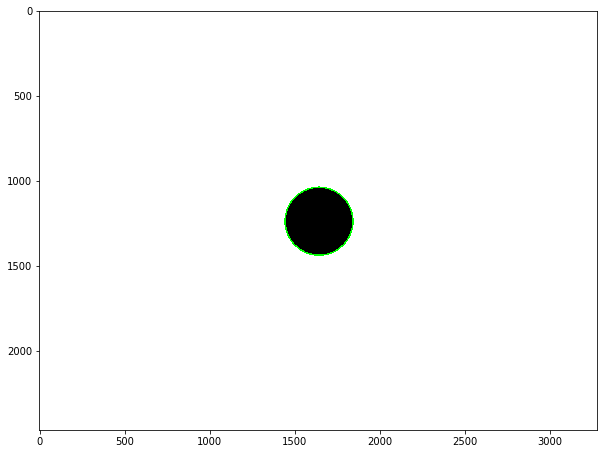

x=1645.50292969, y=1238.5012207, width=398.332397461, height=398.335083008, angle=0.0
0.682510156318
Computed: x=0.682510156318, theta=0.00367203939079, phi=0.000910663387892, h=0.000766880638672


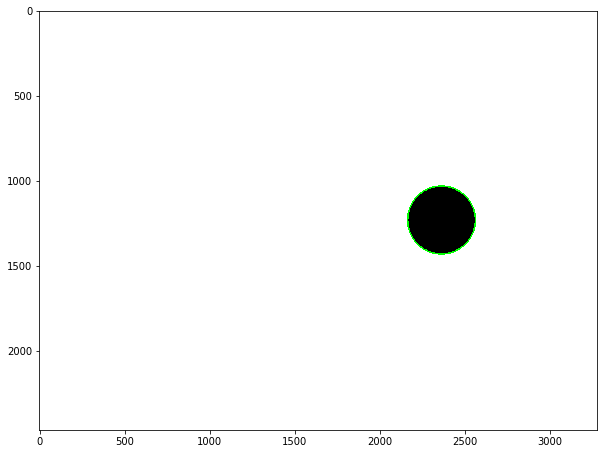

x=2365.49804688, y=1231.5, width=398.336700439, height=398.341644287, angle=90.0
0.682502783594
Computed: x=0.682502783594, theta=0.00498218822451, phi=0.120060503549, h=-5.89787457774e-05


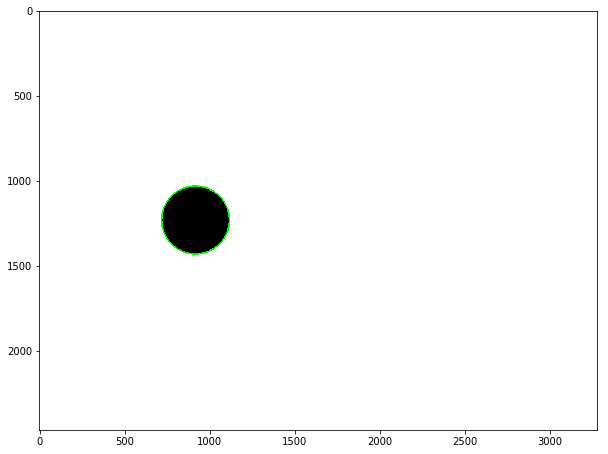

x=919.5, y=1231.5, width=398.329162598, height=398.329162598, angle=0.0
0.682515699038
Computed: x=0.682515699038, theta=0.0, phi=-0.119233391709, h=-5.89805938831e-05


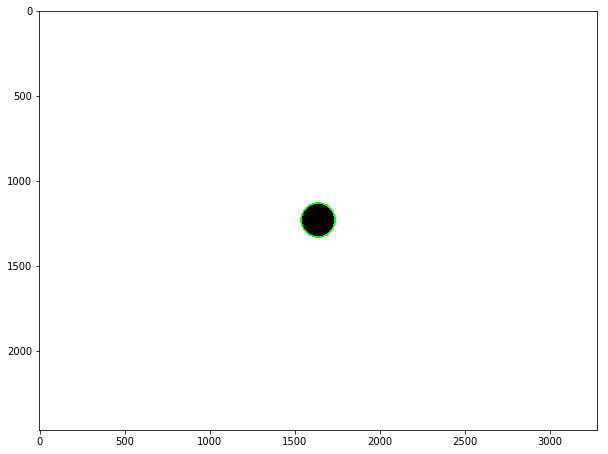

x=1639.5, y=1231.5, width=198.287704468, height=198.33253479, angle=0.0
1.3710679015
Computed: x=1.3710679015, theta=0.0212623923536, phi=-8.27435056967e-05, h=-0.000118456059647


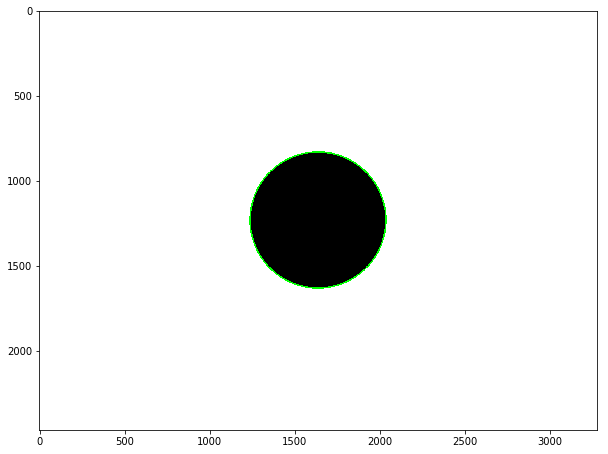

x=1639.50012207, y=1231.5012207, width=798.359191895, height=798.361694336, angle=111.740966797
0.340530815725
Computed: x=0.340530815725, theta=0.00250378610183, phi=-8.27233046455e-05, h=-2.93555328292e-05


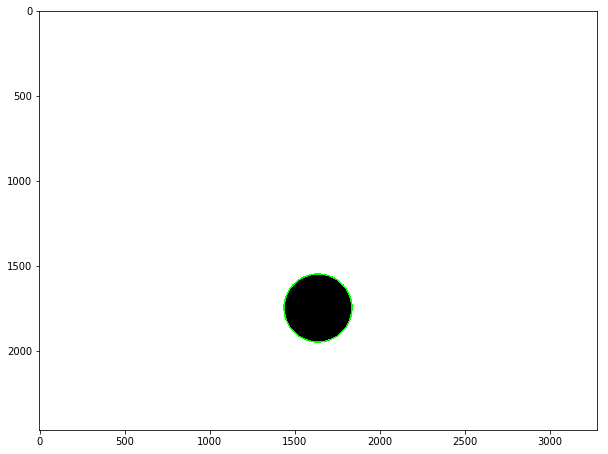

x=1639.5, y=1747.5, width=398.329162598, height=398.329162598, angle=0.0
0.682515699038
Computed: x=0.682515699038, theta=0.0, phi=-8.27435056967e-05, h=0.0609704049849


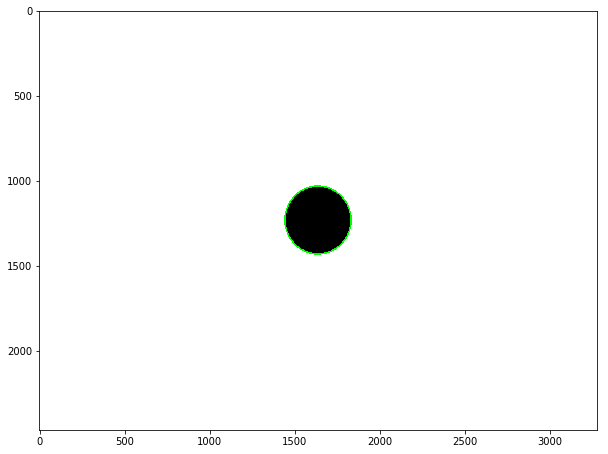

x=1639.5, y=1231.5, width=388.331237793, height=398.357513428, angle=0.0
0.700087658162
Computed: x=0.700087658162, theta=0.224834753105, phi=-8.27435056967e-05, h=-5.89763962748e-05


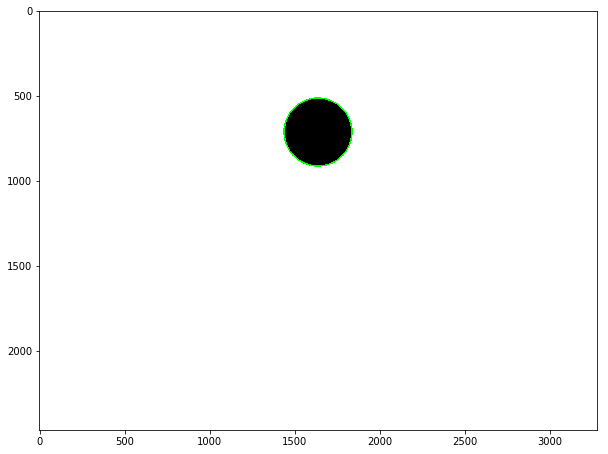

x=1639.5, y=715.5, width=398.329162598, height=398.329162598, angle=0.0
0.682515699038
Computed: x=0.682515699038, theta=0.0, phi=-8.27435056967e-05, h=-0.0610893093612


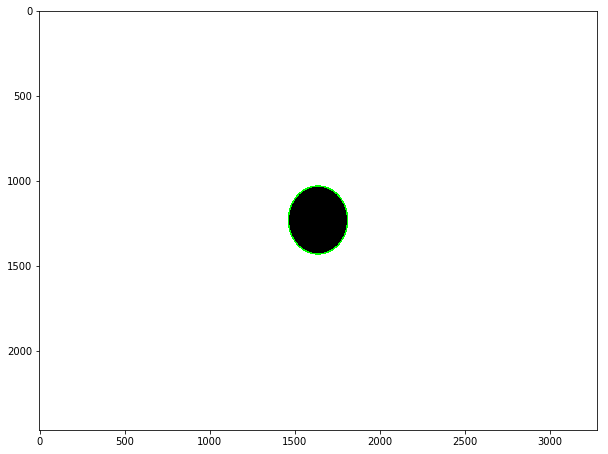

x=1639.5, y=1231.5, width=348.303283691, height=398.404541016, angle=0.0
0.780543622719
Computed: x=0.780543622719, theta=0.506917293852, phi=-8.27435056967e-05, h=-5.89694347134e-05


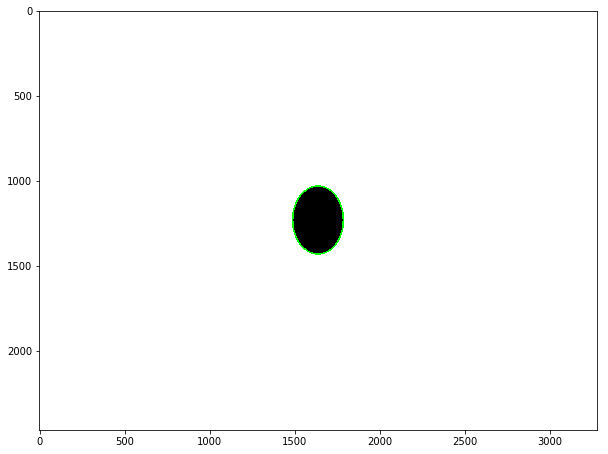

x=1639.5, y=1231.4954834, width=298.393798828, height=398.347503662, angle=0.0
0.911097710225
Computed: x=0.911097710225, theta=0.724125385715, phi=-8.27435056967e-05, h=-5.95106374037e-05


In [5]:

for originalImage in perfectCircles:
    
    img = originalImage.copy()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)

    kernel = np.ones((5,5), np.uint8)

    #erosion = cv2.erode(binary,kernel,iterations = 1)
    #show(erosion)

    #dilation = cv2.dilate(binary, kernel, iterations = 2)
    #show(dilation)

    #opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
    #show(opening)

    returnedImage, contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #print(np.size(contours))
    #print(contours)

    index = 0
    maxArea = 0
    
    for i in range(len(contours)):
        if cv2.contourArea(contours[i])> maxArea:
            index = i
            maxArea = cv2.contourArea(contours[i])
    
    #img = cv2.drawContours(img, contours, index, 200, 8)
    #show(img)
    
    contour = contours[index]

    #cv2.ellipse(img, cv2.fitEllipse(contour), 100, 10)
    elipse = cv2.fitEllipse(contour)
    (x,y), (width, height), angle = elipse
    
    cv2.ellipse(img, elipse, (0,255,0), 8)
    show(img)
    print('x=' + str(x) + ', y=' + str(y) + ', width=' + str(width) + ', height=' + str(height) + ', angle=' + str(angle))

    ## computing parameters
    f = Finder()
    print(f.x(float(width)))
    print('Computed: x=' + str(f.x(width)) + ', theta=' + str(f.theta(width, height)) + ', phi=' + str(f.phi(x)) + ', h=' + str(f.h(y, height)))

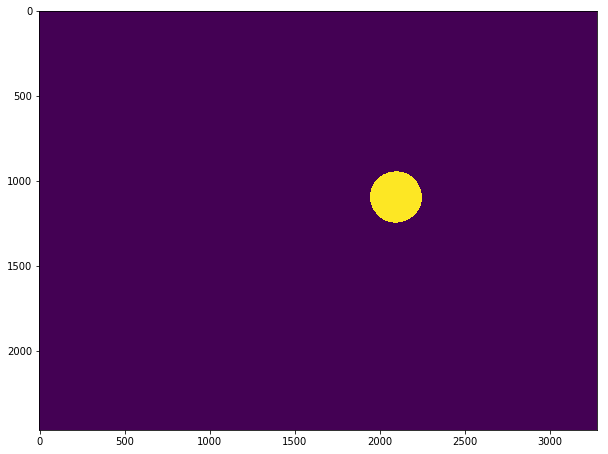

0.1611 0.8942 -0.0210 4.3382


In [6]:
def convertToBinary(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #show(image)
    #flat = np.hstack(np.array(gray))
    #plt.plot(range(len(flat)), flat)
    #plt.show()
    
    ret, binary = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)
    return binary

def printRelativePositionFromBinary(binary):
    
    kernel = np.ones((5,5), np.uint8)
    returnedImage, contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return
    
    # pick largest contour
    index = 0
    maxArea = 0
    
    for i in range(len(contours)):
        if cv2.contourArea(contours[i])> maxArea:
            index = i
            maxArea = cv2.contourArea(contours[i])
    
    (x,y), (width, height), angle = cv2.fitEllipse(contours[index])
    
    ## computing parameters
    f = Finder()
    
    rComputed = f.x(width)
    thetaComputed = f.theta(width, height)
    phiComputed = f.phi(x)
    hComputed = f.h(y, height)
    
    xRelative = rComputed * np.sin(thetaComputed)
    yRelative = rComputed * np.cos(thetaComputed)
    zRelative = hComputed
    phiRelative = phiComputed * 180 / np.pi
    
    print(str("%.4f" % xRelative) + ' ' + str("%.4f" % yRelative) + ' ' + str("%.4f" % zRelative) + ' ' + str("%.4f" % phiRelative))
    
binary = convertToBinary(redCircle)
show(binary)
printRelativePositionFromBinary(binary)